In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../../../')
import utils
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
CALIBRATION_FILE = '../../../../../calibration/out/C.mat'
DATA_FILE = '../../../../../experiment_data/blue_feet/test_chasis_movement/14/important_experiments/2017.06.05_13.51.57_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2017/6/5  13:51:57
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



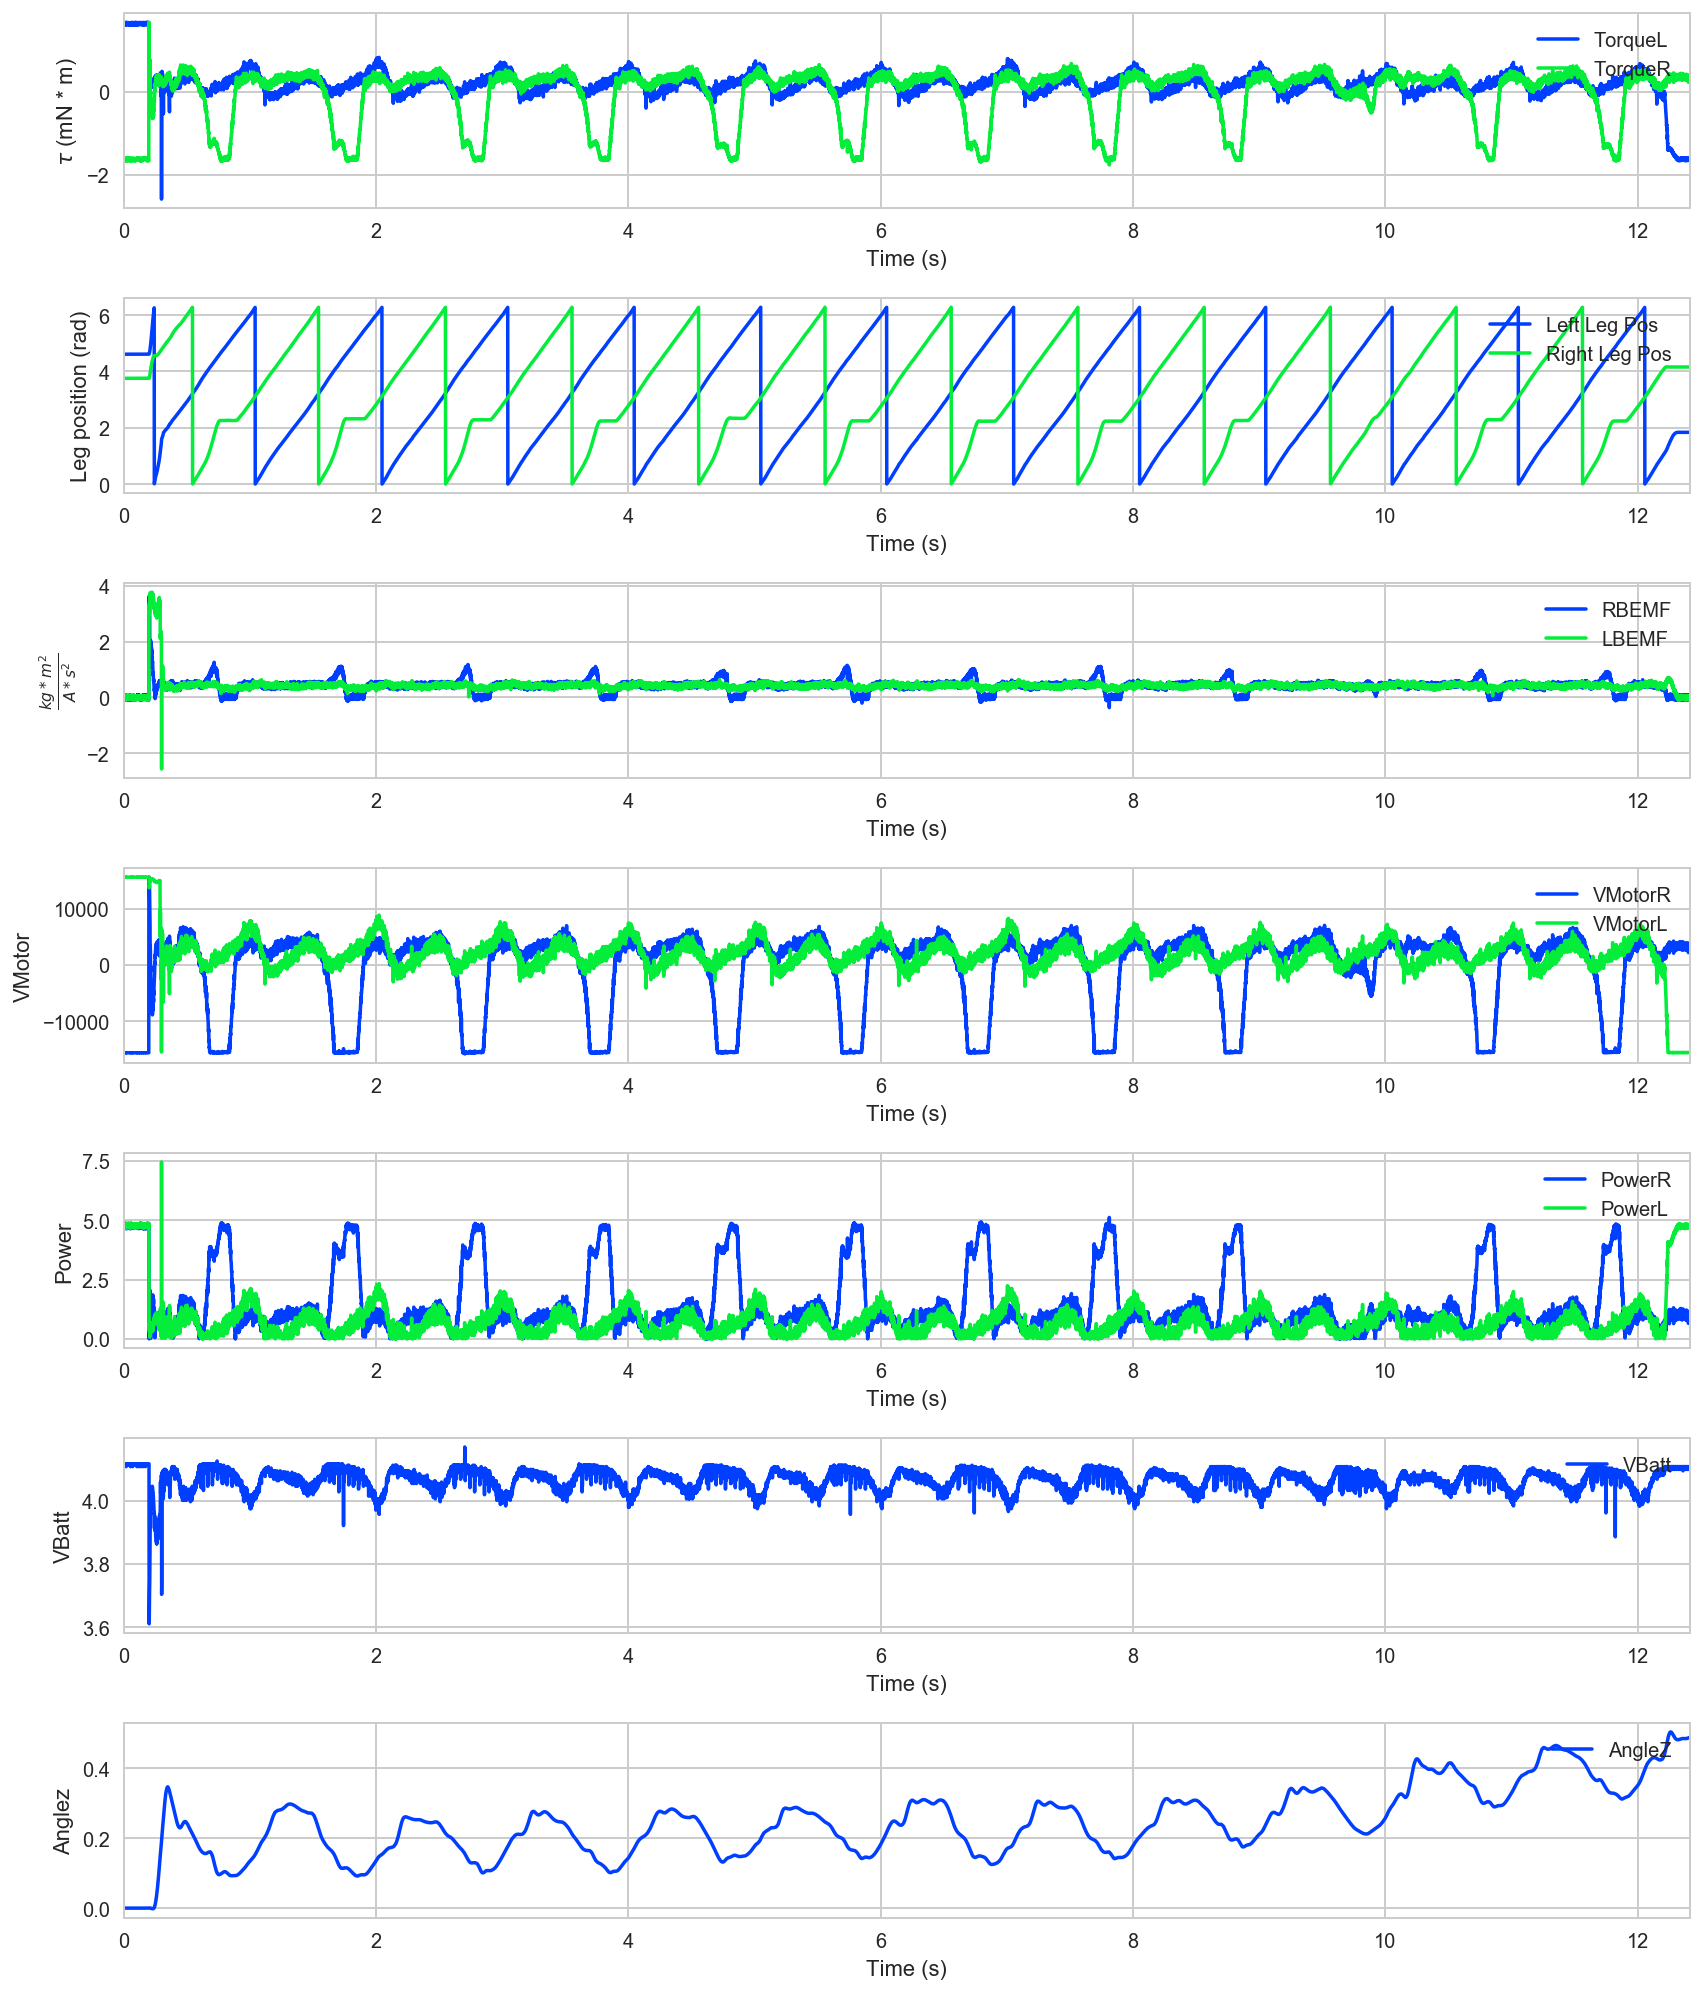

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

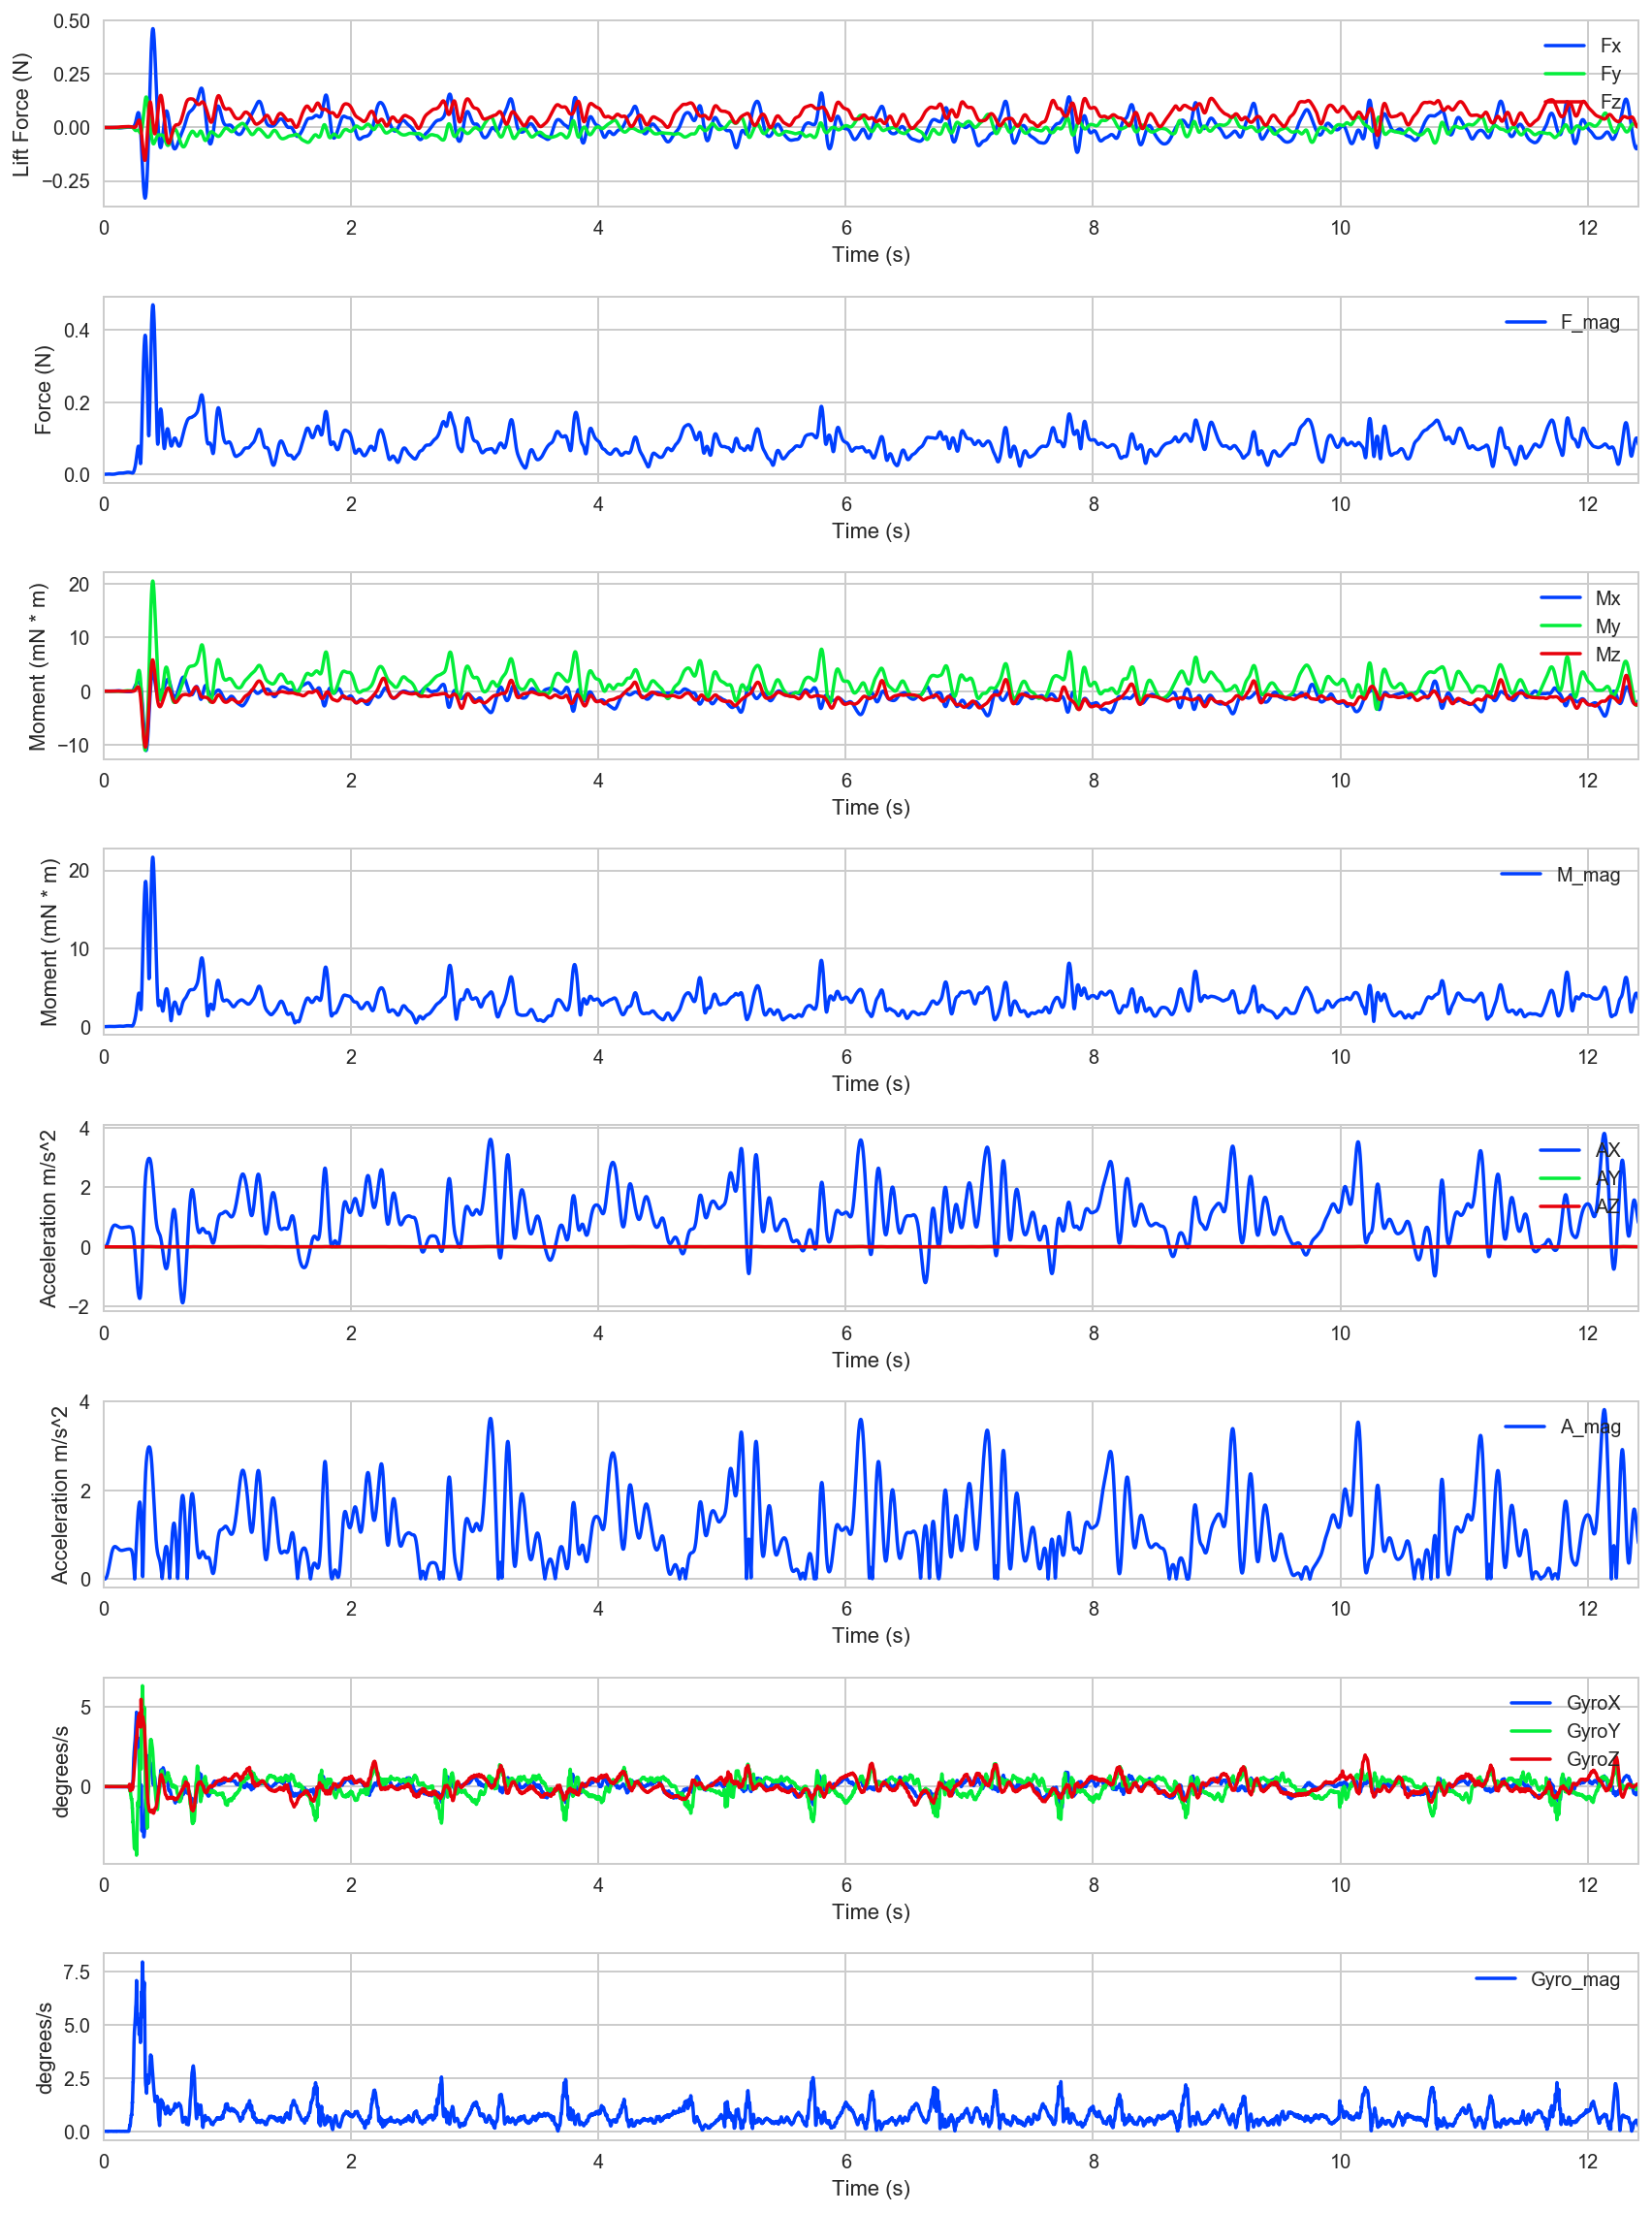

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

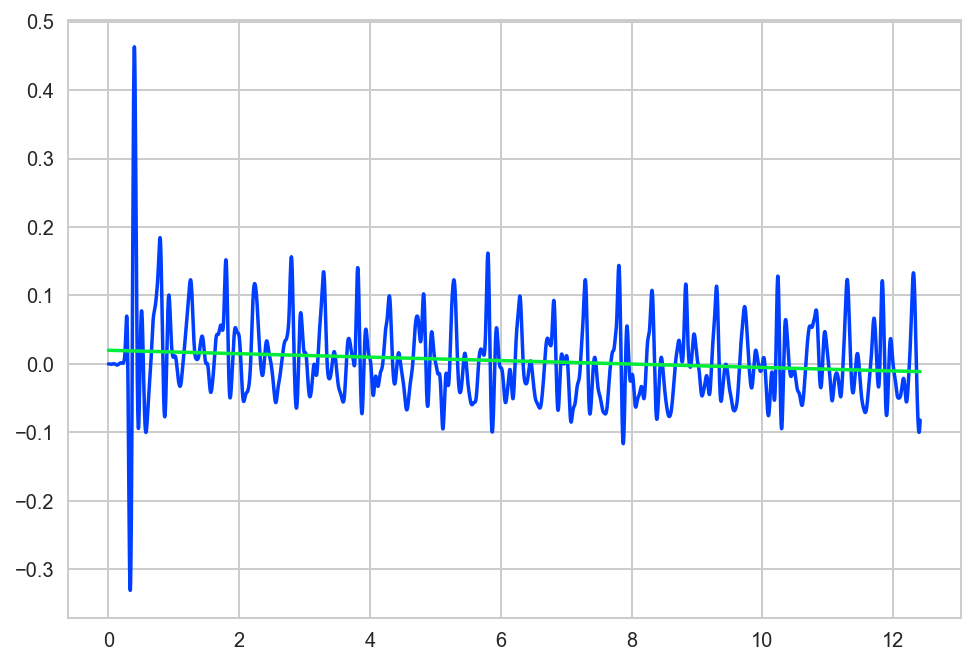

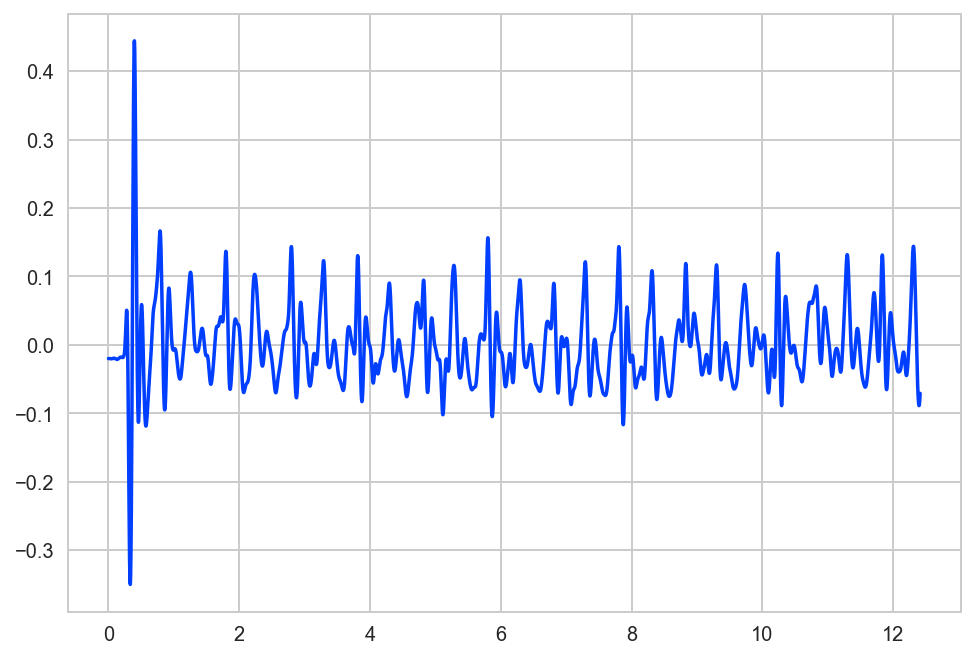

In [6]:
utils.fit_line_to_single_column(df)
utils.plot_columns()


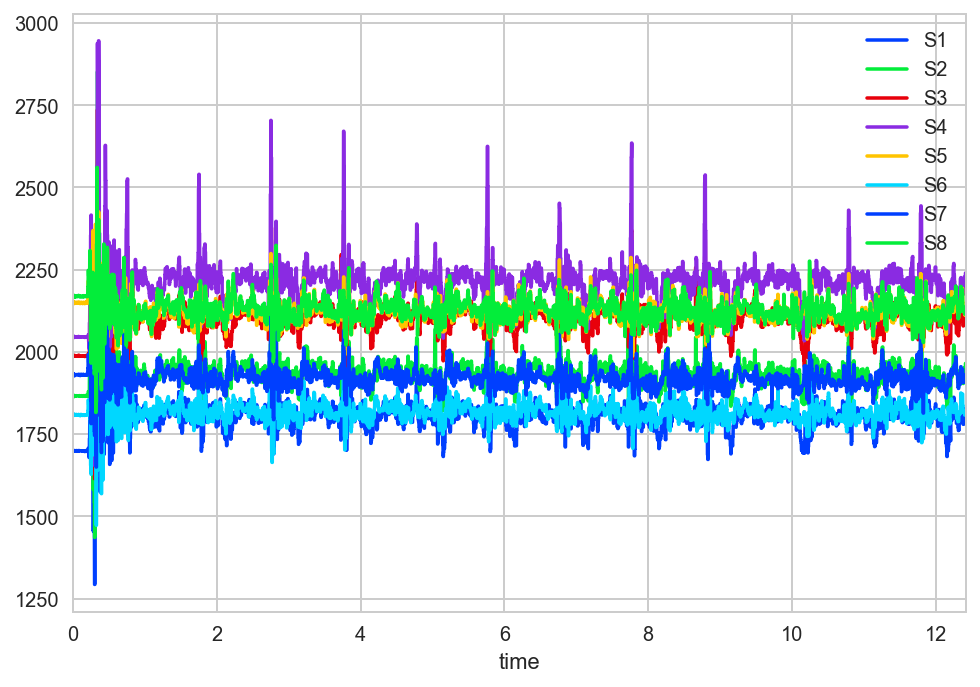

In [7]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [8]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=4000,end_time=8000)
print drag

drag energy (mJ): -0.544984373971
-0.544984373971


In [9]:
print "Here is the cost of transport for inside flaps"
cot = utils.cost_of_transport_inside_flaps(df, has_bottom_shell=False, v_avg=0.05986531987,
                                           start_time=4000, end_time=8000, same_power_across_experiments=0)
print cot

Here is the cost of transport for inside flaps
power:2.15927714012
50.1774318104


In [10]:
electrical_energy_cont = utils.calculate_electrical_energy_cont(df, start_time=4000,end_time=8000)
electrical_energy = utils.calculate_electrical_energy(df, start_time=4000, end_time=8000)

electrical energy cont: 8.63817057907
electrical energy (Joules): 8.63710856048


In [11]:
import numpy as np
start = df['Right Leg Pos'][3500:4500].argmax()
end = df['Right Leg Pos'][6500:7000].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

3549 6550
6.28165147524
6.2828021097
[[3549 4549]
 [4549 5549]
 [5549 6549]
 [6549 7549]]


In [12]:
drags = utils.get_drag_energy_from_list(df, False, intervals)

drag energy (mJ): 0.370678244473
drag energy (mJ): 0.246028041345
drag energy (mJ): -0.132276345538
drag energy (mJ): -0.622774279311
